<a href="https://colab.research.google.com/github/ZainabAbdulfatah25/my-data-analysis-projects/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mini Project: E-Commerce Orders Analysis
#Dataset Creation
import pandas as pd
import numpy as np

# Simulate synthetic E-commerce dataset
np.random.seed(42)

orders = {
    "Order_ID": [f"ORD{i}" for i in range(1001, 1051)],
    "Customer": np.random.choice(
        ["Aisha", "Bello", "Chioma", "Zainab", "Tunde", "Fatima", "John", "Maryam", "Grace", "Ibrahim"], 50),
    "Region": np.random.choice(["North", "South", "East", "West"], 50),
    "Product": np.random.choice(["Laptop", "Phone", "Shoes", "Bag", "Watch", "Headphones"], 50),
    "Quantity": np.random.randint(1, 6, size=50),
    "Unit_Price": np.random.randint(10000, 150000, size=50),
    "Order_Date": pd.date_range(start="2024-01-01", periods=50, freq="7D")
}

orders_df = pd.DataFrame(orders)
orders_df["Total_Sales"] = orders_df["Quantity"] * orders_df["Unit_Price"]

# Introduce some missing and duplicate values for realism
orders_df.loc[3, "Product"] = np.nan
orders_df = pd.concat([orders_df, orders_df.iloc[[5]]], ignore_index=True)

print(orders_df.head(10))


  Order_ID Customer Region Product  Quantity  Unit_Price Order_Date  \
0  ORD1001     John   East   Watch         5       77172 2024-01-01   
1  ORD1002   Zainab   East  Laptop         5      103264 2024-01-08   
2  ORD1003   Maryam  South  Laptop         3       36736 2024-01-15   
3  ORD1004    Tunde  North     NaN         5      122859 2024-01-22   
4  ORD1005     John   West  Laptop         4      122181 2024-01-29   
5  ORD1006  Ibrahim  South     Bag         5      141926 2024-02-05   
6  ORD1007   Chioma   West   Shoes         3      100084 2024-02-12   
7  ORD1008     John   West   Shoes         3       17392 2024-02-19   
8  ORD1009   Maryam  South  Laptop         4       65680 2024-02-26   
9  ORD1010    Tunde  South   Shoes         2       60859 2024-03-04   

   Total_Sales  
0       385860  
1       516320  
2       110208  
3       614295  
4       488724  
5       709630  
6       300252  
7        52176  
8       262720  
9       121718  


**Data Cleaning**
Tasks
Handle missing values.
1. Remove duplicate rows.
2. Add a Profit column (random profit margin between 10–30%).
3. Convert Order_Date to datetime format.


In [ ]:
#Solution
# Handle missing product names
orders_df["Product"].fillna("Unknown", inplace=True)

# Remove duplicates
orders_df.drop_duplicates(inplace=True)

# Add profit margin
orders_df["Profit"] = orders_df["Total_Sales"] * np.random.uniform(0.1, 0.3, size=len(orders_df))

# Ensure proper data types
orders_df["Order_Date"] = pd.to_datetime(orders_df["Order_Date"])

print("Cleaned dataset info:")
print(orders_df.info())


Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order_ID     50 non-null     object        
 1   Customer     50 non-null     object        
 2   Region       50 non-null     object        
 3   Product      50 non-null     object        
 4   Quantity     50 non-null     int64         
 5   Unit_Price   50 non-null     int64         
 6   Order_Date   50 non-null     datetime64[ns]
 7   Total_Sales  50 non-null     int64         
 8   Profit       50 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 3.9+ KB
None


/tmp/ipython-input-2894372401.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df["Product"].fillna("Unknown", inplace=True)


**Exploratory Data Analysis (EDA)**
Tasks
1. Find total revenue and total profit.
2. Determine the most purchased product.
3. Group data by region to find top-performing region.
4. Identify the month with the highest total sales.


In [ ]:
#Revenue and Profit
total_revenue = orders_df["Total_Sales"].sum()
total_profit = orders_df["Profit"].sum()
print(f"Total Revenue: ₦{total_revenue:,.0f}")
print(f"Total Profit: ₦{total_profit:,.0f}")

#Most Purchased Product
top_product = orders_df.groupby("Product")["Quantity"].sum().idxmax()
print("Most Purchased Product:", top_product)

#Regional Performance with % of Total Sales
region_sales = orders_df.groupby("Region")["Total_Sales"].sum()
region_sales_pct = (region_sales / total_revenue) * 100
region_perf = pd.DataFrame({
    "Total_Sales": region_sales,
    "Sales_%": region_sales_pct
}).round(2)
print("\nRegional Performance (of Total Sales):")
print(region_perf)

#Monthly Sales Trend with % of Total Sales
orders_df["Month"] = orders_df["Order_Date"].dt.month_name()
monthly_sales = orders_df.groupby("Month")["Total_Sales"].sum()
monthly_sales_pct = (monthly_sales / total_revenue) * 100
monthly_trend = pd.DataFrame({
    "Total_Sales": monthly_sales,
    "Sales_%": monthly_sales_pct
}).sort_values("Total_Sales", ascending=False).round(2)

print("\nMonthly Sales Trend (of Total Sales):")
print(monthly_trend)


Total Revenue: ₦13,456,390
Total Profit: ₦2,970,574
Most Purchased Product: Laptop

Regional Performance (of Total Sales):
        Total_Sales  Sales_%
Region                      
East        1660564    12.34
North       1937363    14.40
South       5319160    39.53
West        4539303    33.73

Monthly Sales Trend (of Total Sales):
           Total_Sales  Sales_%
Month                          
April          2185303    16.24
January        2115407    15.72
August         1535057    11.41
February       1324778     9.84
July           1203939     8.95
May            1132922     8.42
September      1103119     8.20
March           903873     6.72
November        793772     5.90
October         686539     5.10
June            293920     2.18
December        177761     1.32


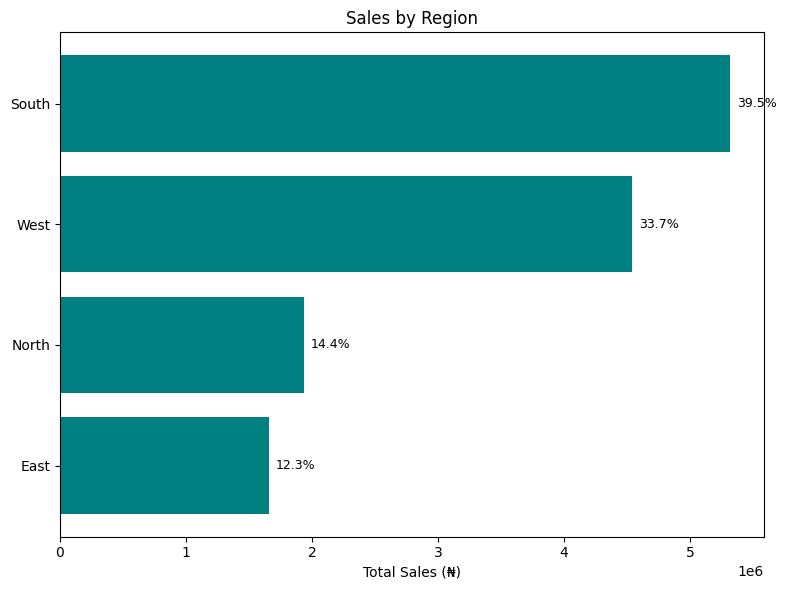

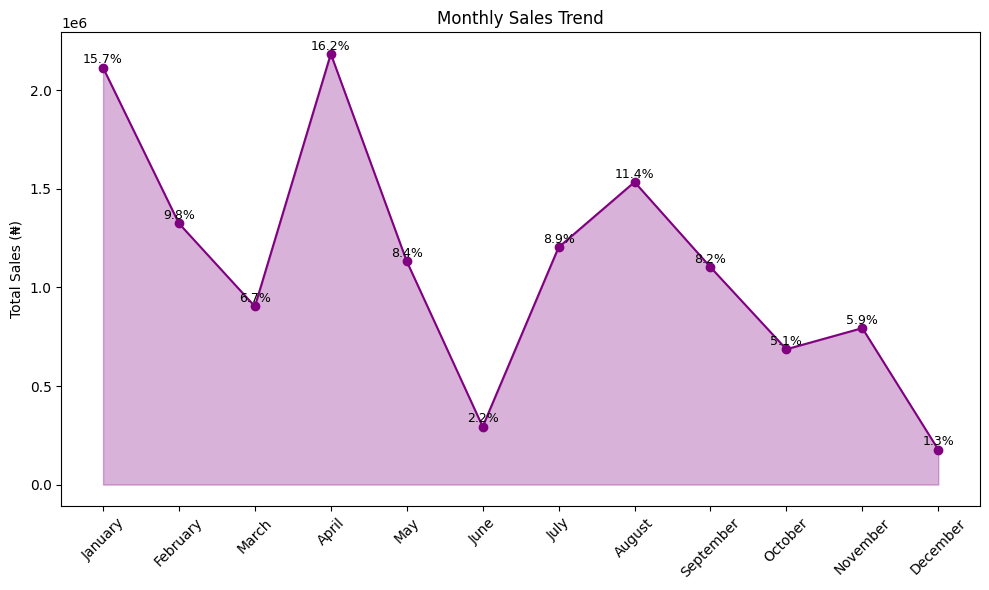

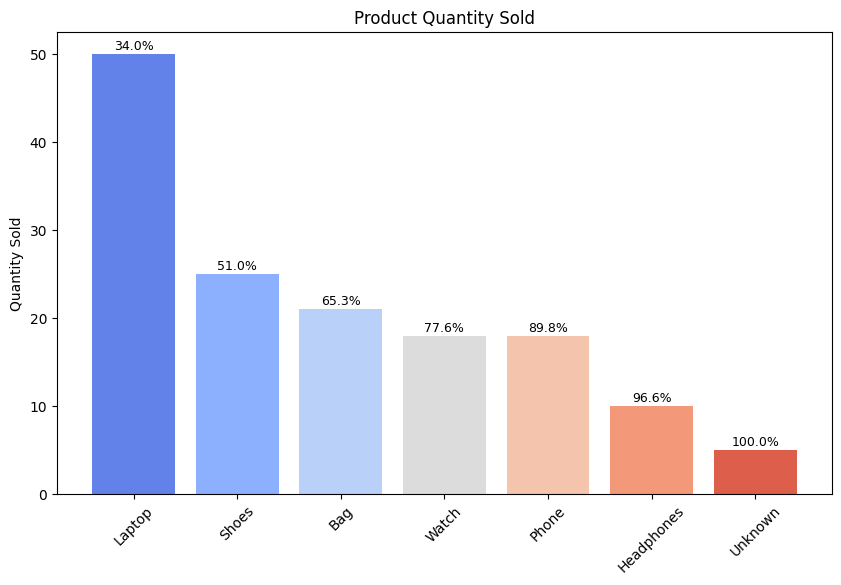

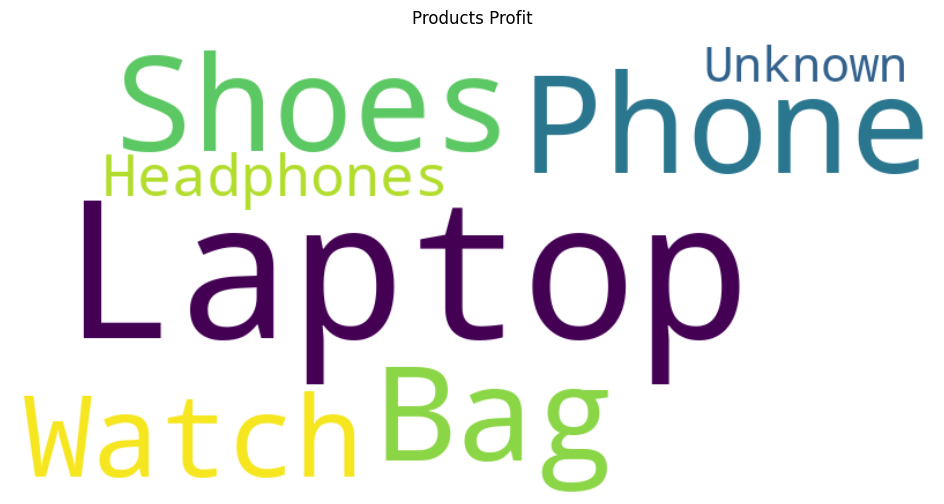

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Regional Sales Bar Chart
plt.figure(figsize=(8,6))
region_sales_sorted = region_sales.sort_values()
bars = plt.barh(region_sales_sorted.index, region_sales_sorted.values, color="teal")
plt.title("Sales by Region")
plt.xlabel("Total Sales (₦)")

# Annotate with percentages
region_sales_pct = (region_sales_sorted / region_sales_sorted.sum()) * 100
for bar, pct in zip(bars, region_sales_pct):
    width = bar.get_width()
    plt.text(width + region_sales_sorted.max()*0.01, bar.get_y() + bar.get_height()/2,
             f"{pct:.1f}%", va='center', fontsize=9)
plt.tight_layout()
plt.show()


# Monthly Sales Area Chart with % of Total
plt.figure(figsize=(10,6))
monthly_sales_sorted = monthly_sales.sort_index(key=lambda x: pd.to_datetime(x, format='%B'))
monthly_sales_pct = (monthly_sales_sorted / monthly_sales_sorted.sum()) * 100

plt.fill_between(monthly_sales_sorted.index, monthly_sales_sorted.values, color="purple", alpha=0.3)
plt.plot(monthly_sales_sorted.index, monthly_sales_sorted.values, marker='o', color="purple")
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales (₦)")

# Annotate each month with % of total sales
for x, y, pct in zip(monthly_sales_sorted.index, monthly_sales_sorted.values, monthly_sales_pct):
    plt.text(x, y + monthly_sales_sorted.max()*0.01, f"{pct:.1f}%", ha='center', fontsize=9)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Product Quantity Sorted Bar Chart with Cumulative %
product_qty = orders_df.groupby("Product")["Quantity"].sum().sort_values(ascending=False)
cum_pct = product_qty.cumsum() / product_qty.sum() * 100

plt.figure(figsize=(10,6))
bars = plt.bar(product_qty.index, product_qty.values, color=sns.color_palette("coolwarm", len(product_qty)))
plt.title("Product Quantity Sold")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)

# Annotate bars with cumulative %
for bar, pct in zip(bars, cum_pct):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + product_qty.max()*0.01, f"{pct:.1f}%", ha='center', fontsize=9)

from wordcloud import WordCloud

# Create a dictionary: {Product: Profit}
profit_dict = orders_df.groupby("Product")["Profit"].sum().to_dict()

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis")
wordcloud.generate_from_frequencies(profit_dict)

# Plot
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Products Profit")
plt.show()

